## Попробуем разные фильтры с целью - подсветить неоднородности керна

In [1]:
import cv2
import numpy as np
import requests
from matplotlib import pyplot as plt
from ipywidgets import interact, FloatSlider

# Загружаем изображение из URL
url_core_image = 'https://github.com/aleksandrbogdanovmsu/comp_vision_classes/blob/main/HW2%20-%20Filters/kore.png?raw=true'
response = requests.get(url_core_image)
gray_image = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_GRAYSCALE)


def calculate_edge_contrast(image):
    """
    Оценивает контрастность краев на основе градиентов Sobel.
    """
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    edge_contrast = np.sum(np.abs(sobel_x)) + np.sum(np.abs(sobel_y))
    return edge_contrast


def find_optimal_sharpen_intensity_sobel(image, step=0.05, max_intensity=5):
    """
    Подбирает оптимальную интенсивность фильтра Sharpen для максимизации контрастности краев.
    """
    best_intensity = 0
    max_contrast = 0
    contrast_values = []

    for intensity in np.arange(0, max_intensity + step, step):
        sharpen_kernel = np.array([[0, -1, 0], [-1, 5 + intensity, -1], [0, -1, 0]])
        sharpened_image = cv2.filter2D(image, -1, sharpen_kernel)
        edge_contrast = calculate_edge_contrast(sharpened_image)
        contrast_values.append(edge_contrast)

        if edge_contrast > max_contrast:
            max_contrast = edge_contrast
            best_intensity = intensity

    return best_intensity, contrast_values


# Поиск оптимальной интенсивности
step = 0.05
max_intensity = 5
optimal_intensity, contrast_values = find_optimal_sharpen_intensity_sobel(gray_image, step=step, max_intensity=max_intensity)

# Функция для обновления изображения с заданной интенсивностью
def update_image_with_sharpen(intensity):
    """
    Применяет фильтр Sharpen к изображению с заданной интенсивностью и отображает его.
    """
    sharpen_kernel = np.array([[0, -1, 0], [-1, 5 + intensity, -1], [0, -1, 0]])
    sharpened_image = cv2.filter2D(gray_image, -1, sharpen_kernel)
    plt.figure(figsize=(6, 6))
    plt.imshow(sharpened_image, cmap='gray')
    plt.title(f"Sharpen Intensity: {intensity:.2f}")
    plt.axis('off')
    plt.show()

# Создаем интерактивный ползунок
interact(
    update_image_with_sharpen,
    intensity=FloatSlider(
        value=optimal_intensity,
        min=0.0,
        max=5.0,
        step=0.05,
        description="Sharpen Intensity"
    )
)

print(f"Оптимальная интенсивность фильтра Sharpen: {optimal_intensity:.2f}")


interactive(children=(FloatSlider(value=0.45, description='Sharpen Intensity', max=5.0, step=0.05), Output()),…

Оптимальная интенсивность фильтра Sharpen: 0.45


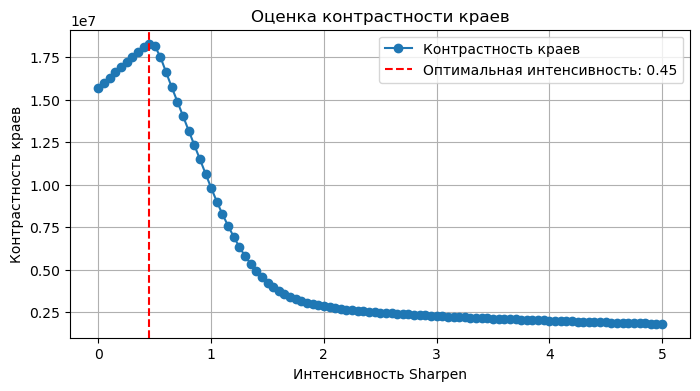

In [3]:
# Построение графика контрастности краев
intensities = np.arange(0, max_intensity + step, step)
plt.figure(figsize=(8, 4))  # Уменьшенный график
plt.plot(intensities, contrast_values, marker='o', label='Контрастность краев')
plt.axvline(optimal_intensity, color='r', linestyle='--', label=f'Оптимальная интенсивность: {optimal_intensity:.2f}')
plt.xlabel('Интенсивность Sharpen')
plt.ylabel('Контрастность краев')
plt.title('Оценка контрастности краев')
plt.legend()
plt.grid()
plt.show()

## На мой взгляд отлично отработали фильтры для серых оттенков (в породе очень много серых оттенков) и фильтр рельефа - подсветил неоднородности